In [1]:
%matplotlib inline
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import datetime

In [2]:
train_df = pd.read_csv('../data/input/train.csv', header=0)

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


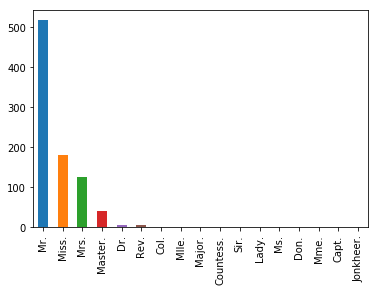

In [4]:
import re

train_df['Name'].map(lambda x: re.findall(r'(\w+\.+)', x)[0]).value_counts().plot(kind='bar')

In [5]:
df_honorific = train_df[['Name']].applymap(lambda x: re.findall(r'(\w+\.+)', x)[0]).rename({'Name':'honorific'}, axis=1)
df_honorific_num = df_honorific.apply(lambda x: pd.factorize(x)[0]).rename({'honorific':'honorific_num'}, axis=1)
train_df1 = pd.concat([train_df, df_honorific_num], axis=1)

In [6]:
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [7]:
train_df1.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific_num
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN
top,NaN,NaN,NaN,"Carlsson, Mr. Frans Olof",male,NaN,NaN,NaN,347082,NaN,G6,S,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,0.936027
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,1.725341
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,2.000000


In [8]:
train_non_na = train_df1.drop(['Cabin'], axis=1).dropna()

In [9]:
Y = train_non_na['Survived']
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'honorific_num']
X = train_non_na[features]

In [10]:
import numpy as np
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, Y)

clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
test_df = pd.read_csv('../data/input/test.csv', header=0)
test_df_honorific = test_df[['Name']].applymap(lambda x: re.findall(r'(\w+\.+)', x)[0]).rename({'Name':'honorific'}, axis=1)
test_df_honorific_num = test_df_honorific.apply(lambda x: pd.factorize(x)[0]).rename({'honorific':'honorific_num'}, axis=1)
test_df = pd.concat([test_df, test_df_honorific_num], axis=1)
test_y_df = pd.read_csv('../data/input/gender_submission.csv', header=0)

test_non_na = test_df[features].fillna(0)

In [12]:
pred_y = clf.predict(test_non_na)
pred_y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [13]:
test_y_df['pred'] = pred_y

TP = test_y_df[(test_y_df.pred == 1) & (test_y_df.Survived == 1)]['PassengerId'].count()
TN = test_y_df[(test_y_df.pred == 0) & (test_y_df.Survived == 0)]['PassengerId'].count()

FP = test_y_df[(test_y_df.pred == 0) & (test_y_df.Survived == 1)]['PassengerId'].count()
FN = test_y_df[(test_y_df.pred == 1) & (test_y_df.Survived == 0)]['PassengerId'].count()

print(TP)
print(TN)
print(FP)
print(FN)

143
252
9
14


In [14]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.94497607655502391